In [11]:
import pandas as pd
import os
from omegaconf import OmegaConf
import joblib
from sklearn.metrics import log_loss
import warnings
warnings.simplefilter('ignore')
import sys
sys.path.append('..')
from src.preprocessing import get_sdf

In [12]:
%%time
Config = OmegaConf.load('../configs/data.yaml')

train_labels = pd.read_csv(os.path.join(Config.DATA_DIR, 'train_labels.csv'))
val_labels = pd.read_csv(os.path.join(Config.DATA_DIR, 'val_labels.csv'))
metadata = pd.read_csv(os.path.join(Config.DATA_DIR, 'metadata.csv'))

Wall time: 13 ms


In [13]:
sdf = get_sdf(metadata)

100%|██████████| 1570/1570 [00:09<00:00, 164.99it/s]


In [15]:
sdf

,time,temp,m/z,abundance,sample_id,seq,seq_ord,abundance_orig,seq_norm,temp_norm,temp_bin,max_abundance_time,max_abundance_temp,seq_ord_norm,abundance_bin
0,1531.060059,988.685974,28,1.000000e+00,S1569,51786,1,4.358824e+05,0.621890,0.900607,4,1531.06,988.685974,0.000012,8.0
1,1526.979980,986.080017,28,9.947367e-01,S1569,51648,2,4.335882e+05,0.620232,0.898233,4,1531.06,988.685974,0.000024,7.0
2,1576.619995,1011.830017,28,9.924424e-01,S1569,53327,3,4.325882e+05,0.640395,0.921689,4,1531.06,988.685974,0.000036,7.0
3,1398.459961,913.219971,28,9.897436e-01,S1569,47301,4,4.314118e+05,0.568030,0.831864,4,1531.06,988.685974,0.000048,7.0
4,1497.739990,969.835022,28,9.875843e-01,S1569,50659,5,4.304706e+05,0.608356,0.883435,4,1531.06,988.685974,0.000060,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49150826,1868.926025,352.739014,90,3.496547e-07,S0000,18108,19103,-2.869600e-14,0.947716,0.952363,4,431.06,103.666000,0.999791,0.0
49150827,1098.510986,218.845993,89,3.177770e-07,S0000,10682,19104,-2.984505e-14,0.559062,0.590864,2,431.06,103.666000,0.999843,0.0
49150828,1067.687012,213.656998,90,2.484440e-07,S0000,10386,19105,-3.234420e-14,0.543570,0.576854,2,431.06,103.666000,0.999895,0.0
49150829,934.195007,191.158997,99,2.339665e-07,S0000,9108,19106,-3.286605e-14,0.476684,0.516112,2,431.06,103.666000,0.999948,0.0


In [42]:
sample_id = 'S1569'
sample_spectra = sdf[sdf['sample_id'] == sample_id]
sample_spectra = sample_spectra.sort_values(by='time').reset_index(drop=True)

In [43]:
top_abundance_mz = sample_spectra.groupby('m/z')['abundance'].max().sort_values().index.values[-1]

In [45]:
import matplotlib.pyplot as plt

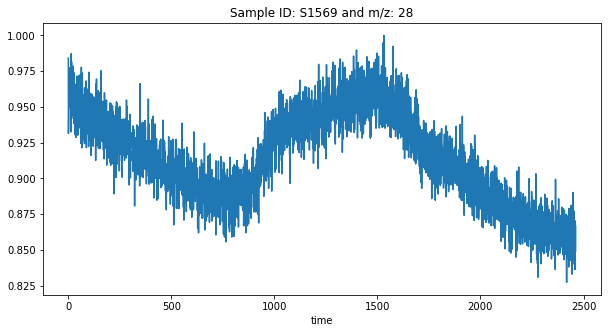

In [48]:
sample_spectra_top = sample_spectra[sample_spectra['m/z'] == top_abundance_mz]
sample_spectra_top.set_index('time')['abundance'].plot(figsize=(10, 5))
_ = plt.title(f'Sample ID: {sample_id} and m/z: {top_abundance_mz}')

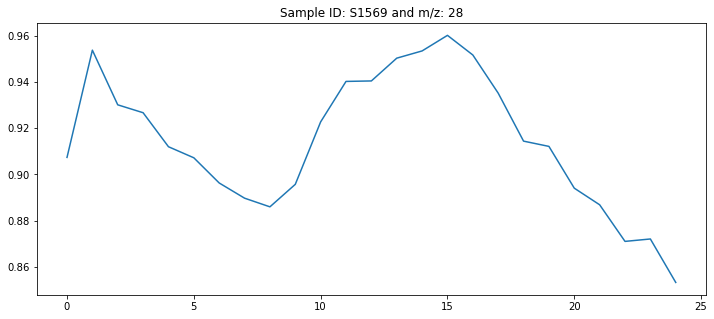

In [50]:
from scipy import signal
res = signal.resample(sample_spectra_top['abundance'], 25)
pd.Series(res).plot(figsize=(12, 5))
_ = plt.title(f'Sample ID: {sample_id} and m/z: {top_abundance_mz}')